# Part 1: The Ideal Case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp
from scipy.interpolate import CubicSpline, interp1d

G = 6.6743*10**-11 # m^3/kg/s^2 Gravitational constant
g0 = 9.81 #  m/s^2 Gravitational Acceleration
Me = 5.972*10**24 # kg Earth mass
Mm = 7.35*10**22 # kg Moon mass
m = 1 # kg test mass
Re = 6378.1*10**3 # m Radius of Earth
Rm = 1738.1*10**3 # m Radius of Moon
omega = 7.272*10**-5 # rad / s Earth rotation rate at the equator

# Free Fall Equation:

d = $v_0$t + $\frac{1}{2}$g$t^2$

$v_0$ = 0 m/s

d = $\frac{1}{2}$g$t^2$

t = $\sqrt{\frac{2d}{g}}$

$g_E$ = $\frac{GM_E}{R_E^2}$

Since the mass will fall 4km which is extremely close to the Earth, we can assume g = 9.81 $m/s^2$

In [2]:
def fall_time(d):
    return np.sqrt((2*d)/g0)
    
d = 4000 # m

time = fall_time(d)

print(f"It would take a test mass {time} seconds to reach the bottom of the 4km shaft assuming no drag.")

It would take a test mass 28.55686245854129 seconds to reach the bottom of the 4km shaft assuming no drag.


$\frac{d^2y}{dt^2}$ = -g - $\alpha$ $(\frac{dy}{dt})^\gamma$

v = $\frac{dy}{dt}$

$\frac{dv}{dt}$ = -g - $\alpha(v)^\gamma$

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  2.843e+01  2.853e+01]
        y: [[ 0.000e+00 -4.915e-02 ... -3.964e+03 -3.992e+03]
            [ 0.000e+00 -9.820e-01 ... -2.789e+02 -2.799e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-4.000e+03, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
The time it takes the mass to hit the bottom of the shaft is 28.556862458541275 seconds


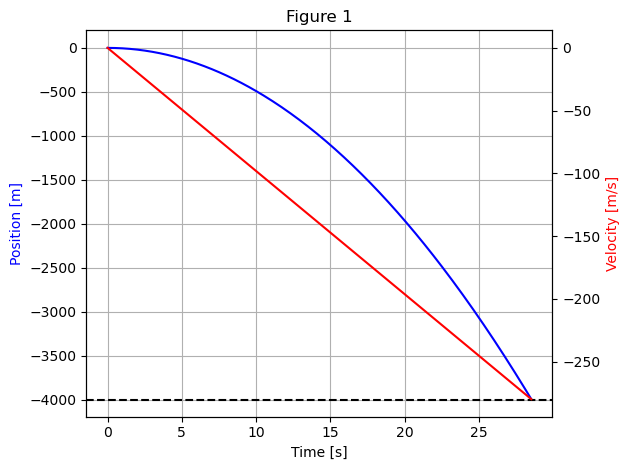

In [3]:
alpha = 0
gamma = 2

def falling(t,s):
    y, v = s
    dydt = v
    dvdt = -g0 - alpha*np.abs(v)**gamma
    return [dydt, dvdt]

def terminate(t,s):
    return s[0] + 4000
    
y0, v0 = 0, 0 # 0 m, 0 m/s
t0,tf = 0,100
t_eval = np.linspace(t0,tf,1000)
terminate.terminal = True
soln = solve_ivp(fun=falling,t_span=(t0,tf), y0=[y0,v0], t_eval=t_eval,events=terminate)
print(soln)

t = soln.t
pos = soln.y[0]
vel = soln.y[1]
t_eve = soln.t_events[0][0]
print(f"The time it takes the mass to hit the bottom of the shaft is {t_eve} seconds")
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(t,vel,label="Velocity",color="red")
ax2.set_ylabel("Velocity [m/s]",color="red")
ax.plot(t,pos,label="Position",color="blue")
ax.set_ylabel("Position [m]",color="blue")
ax.axhline(-4000.0,color='black',ls="--")
ax.set_xlabel("Time [s]")
ax.set_title("Figure 1");
plt.tight_layout()
ax.grid()
plt.savefig("Figure_1.png")

The calculation time using the simple free-fall algebraic expression was and the events detection of solve_ivp are practically the same besides (roughly 28.56 seconds) extremely small decimal values that may vary due to Python's float-point rounding. This makes sense since we set $\alpha = 0$ indicating that our second order equation simplified to $\frac{d^2y}{dt^2} = -g$ and since we assumed constant g the values in the free fall expression was the same as the one used in the function that was integrated by solve_ivp.

# Part 2: Including Drag and a Variable g

It would take a test mass 28.55836060730159 seconds 
to reach the bottom of the shaft assuming no drag and gravity varying with height


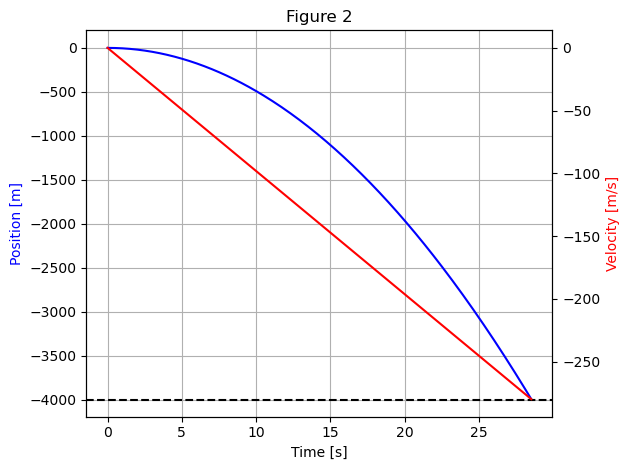

In [4]:
alpha = 0
def grav(r):
    g = g0 * (r/Re)
    return g

def falling(t,s):
    y, v = s
    dydt = v
    dvdt = -grav(y+Re) + alpha*(v)**gamma
    return [dydt, dvdt]

def terminate(t,s):
    return s[0] + 4000
    
y0, v0 = 0, 0 # 0 m, 0 m/s
t0,tf = 0,100
t_eval = np.linspace(t0,tf,1000)
terminate.terminal = True
soln2 = solve_ivp(fun=falling,t_span=(t0,tf), y0=[y0,v0], t_eval=t_eval,events=terminate)

t2 = soln2.t
pos = soln2.y[0]
vel = soln2.y[1]
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(t2,vel,label="Velocity",color="red")
ax2.set_ylabel("Velocity [m/s]",color="red")
ax.plot(t2,pos,label="Position",color="blue")
ax.set_ylabel("Position [m]",color="blue")
ax.axhline(-4000.0,color='black',ls="--")
ax.set_xlabel("Time [s]")
ax.set_title("Figure 2");
plt.tight_layout()
ax.grid()

plt.savefig("Figure_2.png")

print(f"It would take a test mass {soln2.t_events[0][0]} seconds \nto reach the bottom of the shaft assuming no drag and gravity varying with height")

Incorporating a height-dependent g results in faster fall times closer to the surface (smaller r) and slower fall times further from the surface (larger r), we see this in our equation $g(r) = g_0(\frac{r}{R⊕})$, where g scales linearly with distance from the Earth's center. The closer an object is to the center of the Earth, the faster it accelerates, resulting in a faster fall time.

In [ ]:
vf = 50 # m/s
alpha = g0/vf**2
print(f"Alpha = {alpha}")
def grav(r):
    g = g0 * (r/Re)
    return g

def falling(t,s):
    y, v = s
    dydt = v
    dvdt = -grav(y+Re) + alpha*(v)**gamma
    return [dydt, dvdt]

def terminate(t,s):
    return s[0] + 4000
   
y0, v0 = 0, 0 # 0 m, 0 m/s
t0,tf = 0,100
t_eval = np.linspace(t0,tf,1000)
terminate.terminal = True
soln3 = solve_ivp(fun=falling,t_span=(t0,tf), y0=[y0,v0], t_eval=t_eval,events=terminate)

t3 = soln3.t
pos = soln3.y[0]
vel = soln3.y[1]
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(t3,vel,label="Velocity",color="red")
ax2.set_ylabel("Velocity [m/s]",color="red")
ax.plot(t3,pos,label="Position",color="blue")
ax.set_ylabel("Position [m]",color="blue")
ax.axhline(-4000.0,color='black',ls="--")
ax.set_xlabel("Time [s]")
ax.set_title("Figure 2 w/ drag on");
plt.tight_layout()
ax.grid()

plt.savefig("Figure_2_with_drag.png")

print(f"It would take a test mass {soln3.t_events[0][0]} seconds \nto reach the bottom of the shaft with drag on and gravity varying with height")

You can calibrate the value of assuming terminal velocity $v_t = 50$ m/s $\alpha$ by using $m\frac{dv}{dt} = -mg - \alpha|v|^2$ since $\gamma$ = 2, assuming terminal velocity $v_t = 50$ m/s, and knowing that at terminal velocity accleration is 0, leading to $-mg - \alpha|v|^2 = 0$ and $\alpha = \frac{mg}{v_t^2}$. Now m's cancel since we are working with acceleration leading to $\alpha = \frac{g}{v_t^2}$, using g = 9.81 $m/s^2$ and $v_t = 50$ m/s, we get an $\alpha$ value of 0.003924 which is roughly 0.004. Including drag just about triples the amount of time it takes for the mass to hit the bottom of the shaft.

# Part 3: The Coriolis Force

In [ ]:
def grav(r):
    g = g0 * (r/Re)
    return g

Omega = np.array([0,0,omega])
Alpha = alpha
m = 1 # kg

def coriolis(t,s):
    y = s[0:3]
    v = s[3:6]
    dydt = v
    dvdtx = -2*m*np.cross(Omega,v)[0]
    dvdty = -grav((-np.linalg.norm(y, axis=0))+Re) -2*np.cross(Omega,v)[1] + Alpha*np.abs(v[1])**gamma
    dvdtz = -2*m*np.cross(Omega,v)[2]
    dvdt = np.array([dvdtx,dvdty,dvdtz])
    return np.concatenate((dydt, dvdt))

def terminate(t,s):
    return s[1] + 4000

def new_term(t,s):
    return s[0] + 5

ics = np.array([0,0,0,0,0,0])
t0,tf = 0,100
t_eval = np.linspace(t0,tf,1000)
terminate.terminal = True
soln3 = solve_ivp(fun=coriolis,t_span=(t0,tf), y0=ics, t_eval=t_eval,events=(terminate,new_term))

t3 = soln3.t
yx = soln3.y[0] # transverse position
yy = soln3.y[1] # depth
yz = soln3.y[2]
vx = soln3.y[3]
vy = soln3.y[4]
vz = soln3.y[5]

print(f"Crash into the wall happens at t = {soln3.t_events[1][0]} seconds")
print(f"The depth the crash happens at is {-soln3.y_events[1][0][1]} meters")

fig,ax = plt.subplots()
ax.plot(-yy, yx, label="Trajectory",color="red")  
ax.scatter(-yy[::30], yx[::30], color='blue', s=10, label="Time markers") 
ax.set_xlabel("Depth [m]")
ax.set_ylabel("Transverse Position [m]")
ax.set_title("Figure 3")
ax.legend()
plt.tight_layout();

plt.savefig("Figure_3.png")

The test mass does not reach the bottom of the shaft but instead hits the wall first as seen on the plot. Turning on drag results in the test mass hitting the wall at a shallower depth and at a later time compared to when we assumed there was no drag, the plot displaying the trajector did not change either.

# Part 4: An infinitely deep mine

In [ ]:
def grav(r):
    g = g0 * (r/Re)
    return g

Omega = np.array([0,0,0])
Alpha = 0
m = 1 # kg

def coriolis(t,s):
    y = s[0:3]
    v = s[3:6]
    dydt = v
    dvdtx = -2*np.cross(Omega,v)[0]
    dvdty = -grav((-np.linalg.norm(y, axis=0))+Re) -2*np.cross(Omega,v)[1] + Alpha*np.abs(v[1])**gamma
    dvdtz = -2*np.cross(Omega,v)[2]
    dvdt = np.array([dvdtx,dvdty,dvdtz])
    return np.concatenate((dydt, dvdt))

def terminate(t,s):
    return s[1] + Re

def through(t,s):
    return s[1] + 2*Re*.999


ics = np.array([0,0,0,0,0,0])
t0,tf = 0,5000
t_eval = np.linspace(t0,tf,2000)
terminate.terminal = False
through.terminal = False
soln4 = solve_ivp(fun=coriolis,t_span=(t0,tf), y0=ics, t_eval=t_eval, atol=.2073, events=(terminate,through))

t4 = soln4.t
yx = soln4.y[0] # transverse position
yy = soln4.y[1] # depth
yz = soln4.y[2]
vx = soln4.y[3]
vy = soln4.y[4]
vz = soln4.y[5]

fig,ax = plt.subplots()
ax.plot(t4, yy, label="Trajectory",color="blue")  
ax.set_xlabel("Time [s]")
ax.set_ylabel("Depth [m]",color="blue")
ax.set_title("Figure 4")
ax2 = ax.twinx()
ax2.plot(t4,vy,label="Velocity", color="red")
ax2.set_ylabel("Velocity [m/s]",color="red")
ax.legend(loc = "lower right")
ax2.legend(loc="center right")
plt.tight_layout();

plt.savefig("Figure_4.png")

v_center = np.sqrt(soln4.y_events[0][0][3]**2 + soln4.y_events[0][0][4]**2 + soln4.y_events[0][0][5]**2)
v_otherside = np.sqrt(soln4.y_events[1][0][3]**2 + soln4.y_events[1][0][4]**2 + soln4.y_events[1][0][5]**2)


print(f"Object reaches the center of the Earth at t = {soln4.t_events[0][0]} seconds and with a total velocity v = {v_center} m/s")
print(f"Velocity in the y direction at the center of the Earth is {soln4.y_events[0][0][4]} m/s")
print(f"Object reaches otherside at t = {soln4.t_events[1][0]} seconds and with a total velocity v = {v_otherside} m/s")
print(f"Velocity in the y direction at the other side is {soln4.y_events[1][0][4]} m/s")

It will take the object 2479.3 seconds to reach the other side with a total velocity (magnitude) of 517.9 m/s. It takes the object 1266.5 seconds with a total velocity (magnitude) of 7914 m/s.

$v = \sqrt{\frac{GM_e}{R_e}}$

$a = \frac{GM_e}{R_e^2}$

also $a = \frac{4\pi^2*R_e}{T^2}$

giving, $\frac{GM_e}{R_e^2} = \frac{4\pi^2*R_e}{T^2}$

solving for T, $T = \sqrt{\frac{4\pi^2*R_e^3}{GM_e}}$

In [ ]:
velo = np.sqrt(((G*Me)/Re))
print("Orbital Velocity =",velo, "m/s")


T = np.sqrt((4*np.pi**2*Re**3)/(G*Me))
print("Orbital Period =",T,"s")

v = 2*np.pi*Re/T
print("Orbital velocity using v = (2*pi*r)/T is",v, "m/s")

The crossing time of 2479.3 seconds is a little less than half the orbital period which was calculated to be 5069.4 seconds.

# Part 5: A non-uniform Earth

In [ ]:
from scipy.integrate import quad

def rho_int(r,n):
    u = (1-(r**2/Re**2))**n
    return u*r**2

def rho(r,n):
    return (1-(r**2/Re**2))**n

def M_grad(r,n):
    return 4*np.pi*quad(rho_int,0,r,args=(n,))[0]

def Grav_grad(r,n):
    return G*M_grad(r,n)*m/r**2

nval = np.array([0,1,2,9])
nrange = 4
nval = np.array([0,1,2,9])
rho_n = np.zeros(nrange)
r = np.linspace(1,Re,1000)
label = np.array(["n=0","n=1","n=2","n=9"])
F = [[],[],[],[]]

for i in range(nrange):
    n = nval[i]
    int = quad(rho_int,0,Re,args=(n,))[0]
    rho_n[i] = Me/(4*np.pi*int)
    for j in r:
        F[i].append(Grav_grad(j,n)*rho_n[i])
print(rho_n)

fig, ax = plt.subplots()
for i in range(nrange):
    ax.plot(r,rho(r,nval[i]), label=label[i])
ax.set_xlabel('Radius [m]')
ax.set_ylabel(r'Normalized Density $\rho$')
ax.set_title('Figure 5')
ax.legend()
fig.tight_layout()

plt.savefig("Figure_5.png")

fig,ax = plt.subplots()
for i in range(nrange):
    ax.plot(r,F[i],label=label[i])
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Gravitational Force [N]')
ax.set_title('Figure 6')
ax.legend()
fig.tight_layout()

plt.savefig("Figure_6.png")

alpha = 0
gamma = 2
yo,v0 = 0,0 # 0 m, 0 m/s surface of Earth and free fall
i_cs = [y0,v0]
t0,tf = 0,5000
t_eval=np.linspace(t0,tf,2000)

def rho_fall(t,s):
    y,v = s
    dydt = v
    dvdt = -rho_n[i]*Grav_grad(y+Re,n) + alpha*np.abs(v)**gamma
    return [dydt,dvdt]

def diff(t,s):
    return s[0] + Re

def other(t,s):
    return s[0] + 2*Re*0.999
    
diff.terminal = False
other.terminal = False

t_sol = [[],[],[],[]]
y_sol = [[],[],[],[]]
v_sol = [[],[],[],[]]
t_events = [[],[],[],[]]
v_events =[[],[],[],[]]

for i in range(nrange):
    n = nval[i]
    int = quad(rho_int,0,Re,args=(n,))[0]
    rho_n[i] = Me/(4*np.pi*int)
    soln5 = solve_ivp(rho_fall,t_span=(t0,tf),y0=i_cs,t_eval=t_eval,events=(diff,other))
    t_sol[i] = soln5.t
    y_sol[i] = soln5.y[0]
    v_sol[i] = soln5.y[1]
    t_events[i] = soln5.t_events[0][0]
    v_events[i] = soln5.y_events[0][0][1]

fig,ax = plt.subplots(2,2)

for di, i in enumerate(ax.flatten()):
    ax00 = i.twinx()
    i.plot(t_sol[di],y_sol[di],label="Position [m]",color="Blue")
    ax00.plot(t_sol[di],v_sol[di],label="Velocity [m/s]",color="red")
    i.set_xlabel("Time [s]",fontsize=8)
    i.set_ylabel("Position from the Surface [m]",fontsize=9,color="Blue")
    ax00.set_ylabel("Velocity [m/s]",fontsize=8,color="red")
    i.set_title(f"n={nval[di]}")

fig.tight_layout()
fig.suptitle("Figure 7")

plt.savefig("Figure_7.png")

for i in range(len(nval)):
    print(f"n = {nval[i]}, time to reach the center = {t_events[i]} seconds, Velocity = {v_events[i]} m/s")

# Part 6: A lunar mine shaft

In [ ]:
def rho_int(r,n):
    u = (1-(r**2/Rm**2))**n
    return u*r**2

def rho(r,n):
    return (1-(r**2/Rm**2))**n

def M_grad(r,n):
    return 4*np.pi*quad(rho_int,0,r,args=(n,))[0]

def Grav_grad(r,n):
    return G*M_grad(r,n)*m/r**2

nval = np.array([0,1,2,9])
nrange = 4
rho_n = np.zeros(nrange)
r = np.linspace(1,Rm,1000)
label = np.array(["n=0","n=1","n=2","n=9"])

alpha = 0
gamma = 2
yo,v0 = 0,0 # 0 m, 0 m/s surface of Moon and free fall
i_cs = [y0,v0]
t0,tf = 0,5000
t_eval=np.linspace(t0,tf,2000)

def rho_fall(t,s):
    y,v = s
    dydt = v
    dvdt = -rho_n[i]*Grav_grad(y+Rm,n) + alpha*np.abs(v)**gamma
    return [dydt,dvdt]

def diff(t,s):
    return s[0] + Rm

def other(t,s):
    return s[0] + 2*Rm*0.999
    
diff.terminal = False
other.terminal = False

t_sol_m = [[],[],[],[]]
y_sol_m = [[],[],[],[]]
v_sol_m = [[],[],[],[]]
t_events_m = [[],[],[],[]]
v_events_m =[[],[],[],[]]

for i in range(nrange):
    n = nval[i]
    int = quad(rho_int,0,Rm,args=(n,))[0]
    rho_n[i] = Mm/(4*np.pi*int)
    soln6 = solve_ivp(rho_fall,t_span=(t0,tf),y0=i_cs,t_eval=t_eval,events=(diff,other))
    t_sol_m[i] = soln6.t
    y_sol_m[i] = soln6.y[0]
    v_sol_m[i] = soln6.y[1]
    t_events_m[i] = soln6.t_events[0][0]
    v_events_m[i] = soln6.y_events[0][0][1]


for i in range(len(nval)):
    print(f"n = {nval[i]}, time to reach the center = {t_events_m[i]} seconds, Velocity = {v_events_m[i]} m/s")

moon_dense = Mm/((4/3)*np.pi*Rm**3)
earth_dense = Me/((4/3)*np.pi*Re**3)

print(f"The density of the moon is {moon_dense} m/kg^3")
print(f"The density of the Earth is {earth_dense} m/kg^3")

$\rho = \frac{M}{V}$  
In the case of a sphere, $V = \frac{4}{3}$$\pi$$r^3$ 
Meaning, $\rho = \frac{M}{\frac{4}{3}\pi r^3}$  
Leading to $M = \rho\frac{4}{3}\pi r^3$  
$g(r) = \frac{GM}{r^2}$, leading to $g(r) = G\rho \frac{4}{3}\pi r^3$, indicating that density does indeed impact the strength of gravity, which impacts fall time. For a homogenous Earth, the strengh of gravity depends on g(r), which is proportional to $\rho$. Higher density leads to stronger gravity and shorter fall times and lower density results in weakers gravity and longer fall times.
From before we know $T = \sqrt{\frac{4\pi^2*r^3}{GM}}$, once again substituting $M = \rho\frac{4}{3}\pi r^3$ into this equation, leads to $T = \sqrt{\frac{3\pi}{\rho G}}$, meaning $T \varpropto \sqrt{\frac{1}{\rho}}$, indicating that stronger densities lead to shorter fall times, and weaker densities lead to longer fall times.

In [ ]:
print(f"Using our newly found relationship between density and fall/orbit time, t =",np.sqrt((3*np.pi)/(earth_dense*G)),"seconds")
print(f"Our orbit time found earlier in Part 4 is {T} seconds")